In [1]:
import os
import json 
# Change current path in the system 
os.chdir('/home/ad/RoutingComparasion/RoutingComparation/routingcomparison')

# # Check the current directory 
# current_directory = os.getcwd()
# print("Standing at:", current_directory)
def read_data(filename):
    with open(filename) as f:
        data = json.load(f)
    return data

In [2]:
import networkx as nx
from routingapp.compare_algorithm.sec_morl_multipolicy.train import train_sdn_policy
from routingapp.common.routing_utils import * 
from routingapp.common.models import RouteTask
from routingapp.compare_algorithm.sec_morl_multipolicy.module_function import Function
from routingapp.compare_algorithm.sec_morl_multipolicy.module_graph import Graph
from routingapp.compare_algorithm.sec_morl_multipolicy.function_dijkstra import dijkstra, routing_k

func = Function()

In [3]:
from extras.utils import get_topo, get_link_info_legacy
graph = get_topo()
link_info = get_link_info_legacy()

print(link_info)
print(graph)


[{'src.dpid': 6, 'dst.dpid': 2, 'packet_loss': 0.06341463414634146, 'delay': 102.113, 'bandwidth': 100, 'link_usage': 0.0015824175824175897, 'link_utilization': 0.0015824175824175897}, {'src.dpid': 6, 'dst.dpid': 5, 'packet_loss': 0.04878048780487805, 'delay': 58.105, 'bandwidth': 105, 'link_usage': 0.0018434898434898173, 'link_utilization': 0.0017557046128474452}, {'src.dpid': 2, 'dst.dpid': 6, 'packet_loss': 0.06341463414634146, 'delay': 102.113, 'bandwidth': 100, 'link_usage': 0.0015824175824175897, 'link_utilization': 0.0015824175824175897}, {'src.dpid': 2, 'dst.dpid': 1, 'packet_loss': 0.08536585365853659, 'delay': 90.111, 'bandwidth': 131, 'link_usage': 0.001161505161505167, 'link_utilization': 0.0008866451614543261}, {'src.dpid': 5, 'dst.dpid': 6, 'packet_loss': 0.04878048780487805, 'delay': 58.105, 'bandwidth': 105, 'link_usage': 0.0018434898434898173, 'link_utilization': 0.0017557046128474452}, {'src.dpid': 5, 'dst.dpid': 4, 'packet_loss': 0.06097560975609757, 'delay': 144.096

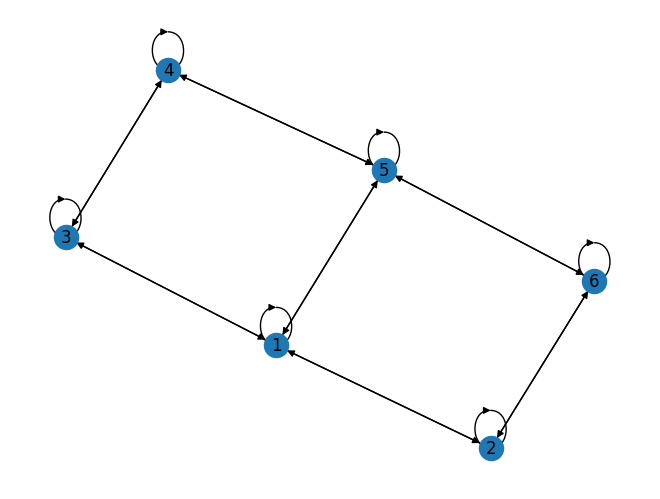

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(graph):
    G = nx.DiGraph()
    for node in graph:
        G.add_node(node)
    for node in graph:
        for neighbour in graph[node]:
            G.add_edge(node, neighbour)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()
draw_graph(graph)

In [5]:
link_info

li_hmap = {}
for d in link_info:
    key = (d['src.dpid'], d['dst.dpid'])
    li_hmap[key] = d
# li_hmap


# Get data from /link_quality
update_delay = []
update_link_utilization = []
update_loss = []
update_link_utilization = []
update_link_usage = []
# Iterate through each link key in the li_hmap dictionary
for link_key, link_data in li_hmap.items():
    packet_loss = link_data.get('packet_loss', 0)
    delay = link_data.get('delay', 0)
    bandwidth = link_data.get('bandwidth',0)
    link_usage = link_data.get('link_usage',0)
    link_utilization = link_data.get('link_utilization',0)

    # Get the source and destination DPIDs from the link key
    src, dst = link_key
    
    # Update the link quality in the graph
    update_delay.append((src, dst, delay))
    update_loss.append((src, dst, packet_loss))
    update_link_utilization.append((src, dst, bandwidth))
    update_link_usage.append((src, dst, link_usage))
    update_link_utilization.append((src, dst, link_utilization))
# print(update_delay, update_loss, update_link_utilization)
# Creating adj-matrix of graph
number_node = len(graph.nodes())
bin_matrix = nx.adjacency_matrix(graph).todense()
adj_matrix = [[] for _ in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

# # Reading request
# routes = tasks.route
# requests = []

# mapping = dict(zip(graph.nodes(), range(1, len(graph.nodes())+1)))
# print(mapping)
# for route in routes:
#     src = f'h{route.src_host}'
#     dst = f'h{route.dst_host}'
#     src = mapping[src]
#     dst = mapping[dst]
#     print('reading rq', src, dst)
#     requests.append((src, dst))
requests = [[6,2]]
# Solving problem to find solution
number_node = len(adj_matrix)-1
# Customize one node for edge server, one node for cloud server, the rest for clients
clients = [i for i in range(1, number_node-1)]
edge_servers = [number_node-1]
cloud_servers = [number_node]
graph_gen = Graph(number_node, 1, 1, 1, 1, clients, edge_servers, cloud_servers, adj_matrix)

func = Function()
graph_gen.updateGraph(update_delay, update_loss, update_link_utilization, update_link_utilization) 

result = routing_k(graph_gen,requests, 1)


# print(graph_gen.number_nodes, graph_gen.adj_matrix, graph_gen.predict_link_utilization)
print(result)


Source: 6, Destination: 2, Path: [6]
[(6, 2, [6])]


In [6]:
SDN_Env(graph=graph, function = func, request=[6, 2], w=1.0)

NameError: name 'SDN_Env' is not defined